In [1]:
import random
import csv
import pickle
import json
import re
import time
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict, learning_curve
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, r2_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.dummy import DummyClassifier
from scipy.spatial import distance
import imblearn.over_sampling

In [2]:
df = pd.read_pickle('LoL_df.pkl')

In [3]:
df.columns

Index(['Blue Winner', 'Match Length', 'Blue First Blood', 'Blue First Tower',
       'Blue First Inhibitor', 'Blue First Baron', 'Blue First Dragon',
       'Blue First Herald', 'Blue Tower Kills', 'Blue Inhibitor Kills',
       ' Blue Baron Kills', 'Blue Dragon Kills', 'Blue Rift Herald Kills',
       'Red Tower Kills', 'Red Inhibitor Kills', ' Red Baron Kills',
       'Red Dragon Kills', 'Red Rift Herald Kills'],
      dtype='object')

In [4]:
df.head(5)

,Blue Winner,Match Length,Blue First Blood,Blue First Tower,Blue First Inhibitor,Blue First Baron,Blue First Dragon,Blue First Herald,Blue Tower Kills,Blue Inhibitor Kills,Blue Baron Kills,Blue Dragon Kills,Blue Rift Herald Kills,Red Tower Kills,Red Inhibitor Kills,Red Baron Kills,Red Dragon Kills,Red Rift Herald Kills
gameId,,,,,,,,,,,,,,,,,,
3508539941,0,35.3,1,1,0,0,0,1,4,0,0,2,1,6,1,1,2,0
3510680882,0,30.9,0,1,0,0,1,1,7,2,0,2,1,5,2,1,1,0
3510731607,1,29.0,1,1,1,1,1,1,10,2,1,2,1,1,0,0,1,0
3512273966,0,23.1,0,0,0,0,1,0,0,0,0,1,0,9,1,1,1,1
3514387059,0,31.0,0,0,0,0,0,0,3,0,0,0,0,8,1,1,3,1


In [41]:
y = df['Blue Winner']
X = df[['Blue First Blood','Blue First Dragon']]

In [42]:
X_train_total, X_test, y_train_total, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8675309)
X_train, X_val, y_train, y_val = train_test_split(X_train_total, y_train_total, test_size=0.25, random_state=407)

In [43]:
std = StandardScaler(with_mean = False)

In [44]:
#X_train_total_scale = std.fit_transform(X_train_total)
X_train_scale = std.fit_transform(X_train)
X_val_scale = std.transform(X_val)
X_test_scale = std.transform(X_test)

In [ ]:
#sns.pairplot(df)

In [ ]:
#def rmse(actuals, preds):
 #   return np.sqrt(((actuals - preds) ** 2).mean())

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, max_features = 1, n_jobs=-1)

In [ ]:
rf.fit(X_train_scale,y_train)

In [ ]:
scores = cross_val_score(rf, X_train_scale, y_train, cv=10, scoring = 'f1')

In [ ]:
scores

In [ ]:
scores

In [ ]:
scores

In [ ]:
scores

In [ ]:
logreg = LogisticRegression(solver='lbfgs')

In [45]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="binary:logistic",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

In [46]:
eval_set=[(X_train_scale,y_train),(X_val_scale,y_val)]

In [48]:
boosted_model = gbm.fit( 
                    #X_train_total, y_train_total,
                    X_train_scale, y_train,
                    eval_set=eval_set,
                    eval_metric='error',
                    early_stopping_rounds=20,
                    verbose=True #gives output log as below
                   )

[0]	validation_0-error:0.36894	validation_1-error:0.36908
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.36894	validation_1-error:0.36908
[2]	validation_0-error:0.36894	validation_1-error:0.36908
[3]	validation_0-error:0.36894	validation_1-error:0.36908
[4]	validation_0-error:0.36894	validation_1-error:0.36908
[5]	validation_0-error:0.36894	validation_1-error:0.36908
[6]	validation_0-error:0.36894	validation_1-error:0.36908
[7]	validation_0-error:0.36894	validation_1-error:0.36908
[8]	validation_0-error:0.36894	validation_1-error:0.36908
[9]	validation_0-error:0.36894	validation_1-error:0.36908
[10]	validation_0-error:0.36894	validation_1-error:0.36908
[11]	validation_0-error:0.36894	validation_1-error:0.36908
[12]	validation_0-error:0.36894	validation_1-error:0.36908
[13]	validation_0-error:0.36894	validation_1-error:0.36908
[14]	validation_0-error

In [37]:
'''preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))'''

'preds = model.predict(D_test)\nbest_preds = np.asarray([np.argmax(line) for line in preds])\n\nprint("Precision = {}".format(precision_score(Y_test, best_preds, average=\'macro\')))\nprint("Recall = {}".format(recall_score(Y_test, best_preds, average=\'macro\')))\nprint("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))'

In [ ]:
scores = cross_val_score(boosted_model, X_train_scale, y_train, cv=3, scoring = 'f1')

In [40]:
scores

array([0.75667918, 0.76098198, 0.75989475])

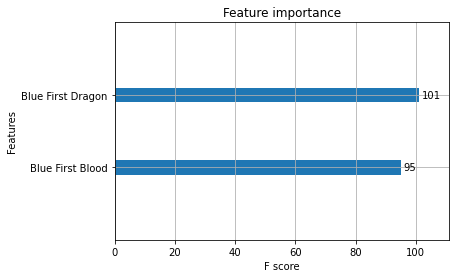

In [39]:
xgb.plot_importance(boosted_model)

In [ ]:
X_train_total_scale = std.fit_transform(X_train_total)
kf = KFold(n_splits=10)
for train_index, val_index in kf.split(X_train_total_scale):
    X_train, X_val = X_train_total_scaletrain_index], X_train_total_scale[val_index]
    y_train, y_val = y_train_total.values[train_index], y_train_total.values[val_index]
    
    gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', 
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )
    eval_set=[(X_train,y_train),(X_val,y_val)]
    gbm.fit( 
                    X3_train_scaled, y_train_val, 
                    eval_set=eval_set,
                    eval_metric='error', 
                    early_stopping_rounds=50,
                    verbose=False
                   )
    print(f1_score(y_val, gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit)) )

First Blood, First Dragon, First Herald,
First Tower, First Baron, First Inhibitor